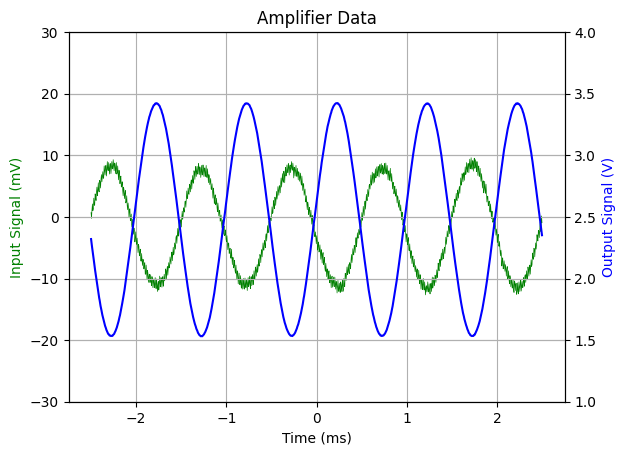

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("scope_0.csv", skiprows=1)
t = data["second"].to_numpy() * 1000
v_out = data["Volt"].to_numpy()
v_in = data["Volt.1"].to_numpy()

v_out_dc = np.mean(v_out)
v_in_dc = np.mean(v_in)

v_out_pp = np.max(v_out) - np.min(v_out)
v_in_pp = np.max(v_in) - np.min(v_in)
gain = v_out_pp / v_in_pp


# Make one chart with two y-scales, one for the input, one for the output
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(t, v_in * 1000, 'g-', linewidth=0.5)
ax2.plot(t, v_out, 'b-')

ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Input Signal (mV)", color='g')
ax1.set_ylim(-30, 30)
ax2.set_ylabel("Output Signal (V)", color='b')
ax2.set_ylim(1, 4)
plt.title("Amplifier Data")
ax1.grid(True, axis="both")
ax2.grid(True, axis="both")
plt.show()

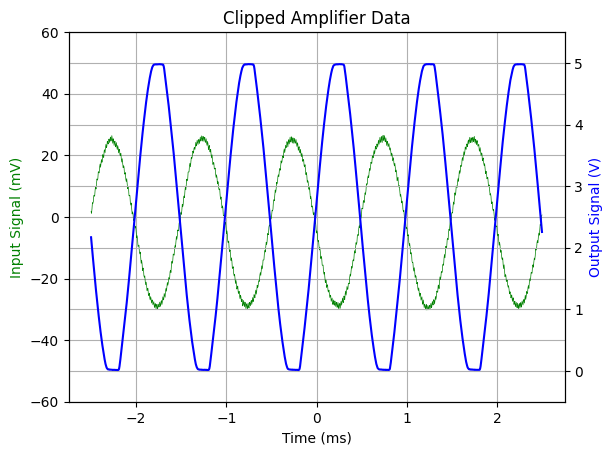

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("scope_1.csv", skiprows=1)
t = data["second"].to_numpy() * 1000
v_out = data["Volt"].to_numpy()
v_in = data["Volt.1"].to_numpy()

v_out_dc = np.mean(v_out)
v_in_dc = np.mean(v_in)

v_out_pp = np.max(v_out) - np.min(v_out)
v_in_pp = np.max(v_in) - np.min(v_in)
gain = v_out_pp / v_in_pp


# Make one chart with two y-scales, one for the input, one for the output
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(t, v_in * 1000, 'g-', linewidth=0.5)
ax2.plot(t, v_out, 'b-')

ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Input Signal (mV)", color='g')
ax1.set_ylim(-60, 60)
ax2.set_ylabel("Output Signal (V)", color='b')
ax2.set_ylim(-0.5, 5.5)
plt.title("Clipped Amplifier Data")
ax1.grid(True, axis="both")
ax2.grid(True, axis="both")
plt.show()

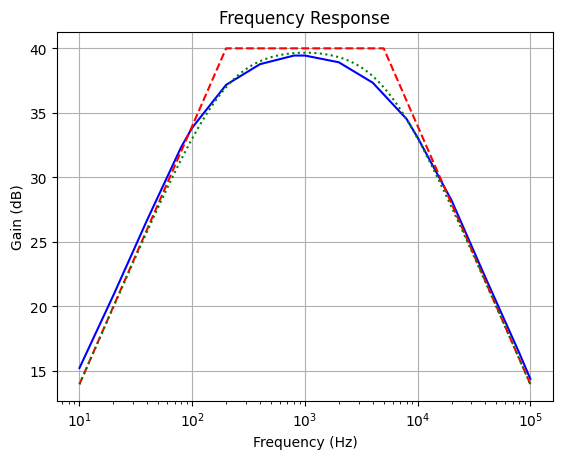

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("freq_sweep.csv")
f = data["frequency"].to_numpy()
v_in = data["amplitude"].to_numpy()
v_out = data["amplitude.1"].to_numpy()
phase = data["phase"].to_numpy()

gain_db = 20 * np.log10(v_out / v_in)
max_gain = np.max(gain_db)

f_ideal = np.logspace(np.log10(10), np.log10(100000), num=1000)
# gain_ideal will be a pass filter with a max of 100 and passband of 200 Hz to 5 kHz
gain_ideal = 100 * (1j * f_ideal / 200) / ((1 + 1j * f_ideal / 200) * (1 + 1j * f_ideal / 5000))
gain_db_ideal = 20 * np.log10(np.abs(gain_ideal))
gain_db_ideal_straight_line = 40 - (f_ideal < 200) * 20 * np.log10(200 / f_ideal) + (f_ideal > 5000) * 20 * np.log10(5000 / f_ideal)

plt.plot(f, gain_db, 'b-')
plt.plot(f_ideal, gain_db_ideal_straight_line, 'r--')
plt.plot(f_ideal, gain_db_ideal, 'g:')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
plt.title("Frequency Response")

plt.grid(True, axis="both")
plt.show()

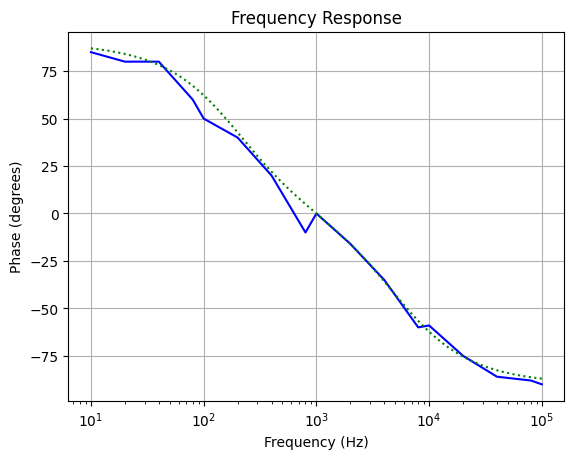

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("freq_sweep.csv")
f = data["frequency"].to_numpy()
v_in = data["amplitude"].to_numpy()
v_out = data["amplitude.1"].to_numpy()
phase = (data["phase"].to_numpy() + 360) % 360 - 180

f_ideal = np.logspace(np.log10(10), np.log10(100000), num=1000)
# gain_ideal will be a pass filter with a max of 100 and passband of 200 Hz to 5 kHz
gain_ideal = 100 * (1j * f_ideal / 200) / ((1 + 1j * f_ideal / 200) * (1 + 1j * f_ideal / 5000))
phase_ideal = np.angle(gain_ideal, deg=True)

plt.plot(f, phase, 'b-')
plt.plot(f_ideal, phase_ideal, 'g:')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (degrees)")
plt.title("Frequency Response")

plt.grid(True, axis="both")
plt.show()